<a href="https://colab.research.google.com/github/gaurav7916/Bike_Sharing_Linear_Regression/blob/main/Bike_Sharing_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boom Bikes Demand Prediction

### Multiple Linear Regression

**Problem Statement:**

BoomBikes, a US bike-sharing company, maintains a daily dataset on rental bikes depending on different environmental and seasonal conditions. It intends to utilize this data to better understand the elements influencing demand for these shared bikes in the American market, as well as to design a strategic business strategy that would allow it to accelerate revenue as soon as the protracted lockdown caused by the Corona epidemic ends.

Essentially, the company wants to know —
- Which variables/attributes are significant in predicting the demand for shared bikes.
- How well these variables describe the bike sharing demands


The solution is divided into the following sections:

- Data understanding and exploration
- Data Visualisation using various graphs and plots
- Data preparation using Scaling and other techniques like Feature Selection using RFE
- Model building using Multiple linerar regression and evaluation of the train and test dataset

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt

#supress warnings
import warnings
warnings.filterwarnings('ignore')

# statsmodels libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('downloads/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


### Data understanding and exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Checking for null values

In [ ]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Checking for duplicate values

In [ ]:
df.duplicated().sum()

0

### Dropping some less important columns  
### (columns 'casual' and 'registered' as these 2 columns sum up to column 'cnt', on the other hand 'instant' and 'dteday' column don't add any value)

In [ ]:
df.drop(['dteday', 'instant', 'casual', 'registered'], axis = 1, inplace = True)

### Checking for unique values

In [ ]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [ ]:
# Function for Checking value_counts()

def print_value_counts(df):
    columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
    for column in columns:
        if column in df.columns:
            print(f"Value counts : {column}")
            counts = df[column].value_counts()
            percentages = df[column].value_counts(normalize=True) * 100
            for value, count in counts.items():
                percentage = percentages[value]
                print(f"{value}: {count} ({percentage:.1f}%)")
            print("\n" + "-"*30 + "\n")

print_value_counts(df)

Value counts : season
3: 188 (25.8%)
2: 184 (25.2%)
1: 180 (24.7%)
4: 178 (24.4%)

------------------------------

Value counts : yr
0: 365 (50.0%)
1: 365 (50.0%)

------------------------------

Value counts : mnth
1: 62 (8.5%)
3: 62 (8.5%)
5: 62 (8.5%)
7: 62 (8.5%)
8: 62 (8.5%)
10: 62 (8.5%)
12: 62 (8.5%)
4: 60 (8.2%)
6: 60 (8.2%)
9: 60 (8.2%)
11: 60 (8.2%)
2: 56 (7.7%)

------------------------------

Value counts : holiday
0: 709 (97.1%)
1: 21 (2.9%)

------------------------------

Value counts : weekday
1: 105 (14.4%)
2: 105 (14.4%)
3: 104 (14.2%)
4: 104 (14.2%)
5: 104 (14.2%)
6: 104 (14.2%)
0: 104 (14.2%)

------------------------------

Value counts : workingday
1: 504 (69.0%)
0: 226 (31.0%)

------------------------------

Value counts : weathersit
1: 463 (63.4%)
2: 246 (33.7%)
3: 21 (2.9%)

------------------------------



## Visualising the Data

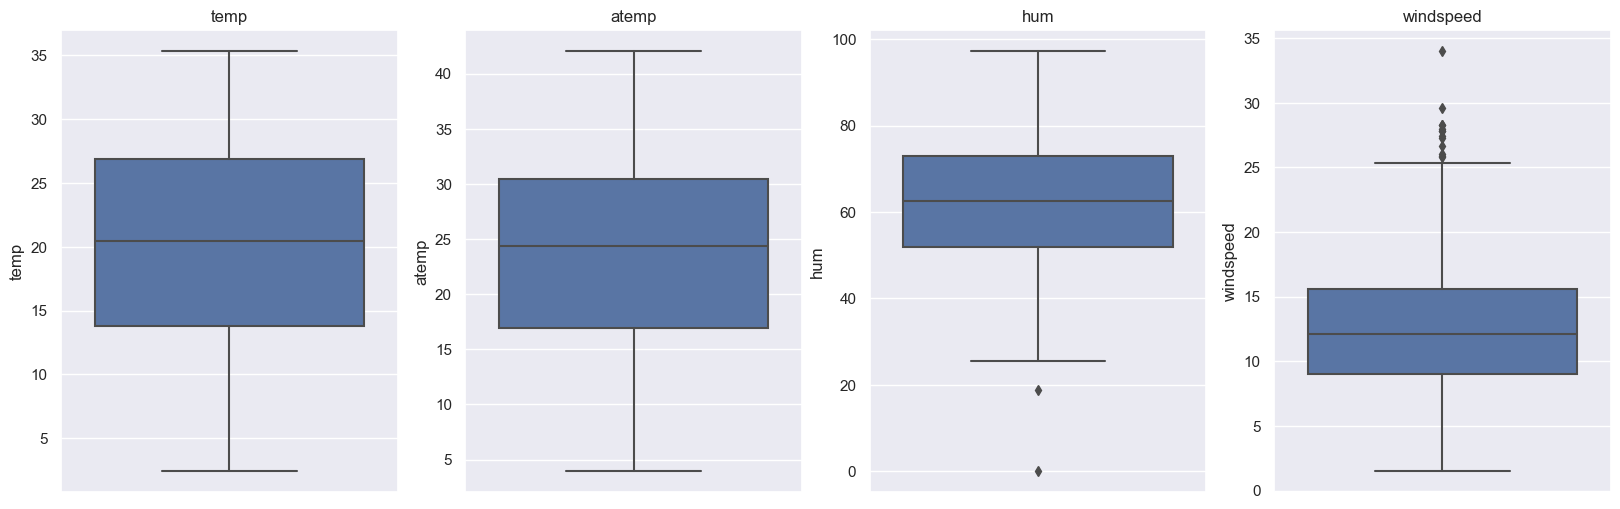

In [ ]:
# Numerical columns

columns = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(20, 6))
for index, col in enumerate(columns):
    plt.subplot(1, 4, index+1)
    sns.boxplot(y=col, data=df)
    plt.title(col)

In [ ]:
#changing categorical data which are numeric to more meaningful name

df.yr.replace((0, 1),  (2018, 2019),inplace = True)

# maped the season column according to descripttions
df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# maped the weekday column according to descriptin
df['weekday'] = df['weekday'].map({0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat'})

# maped mnth column values (1 to 12 ) as (jan to dec) respectively
df['mnth'] = df['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12:'dec'})

#  maped weathersit column
df['weathersit'] = df['weathersit'].map({1: 'Clear_FewClouds', 2: 'Mist_Cloudy', 3: 'LightSnow_LightRain', 4: 'HeavyRain_IcePallets'})

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,mon,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,tue,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,wed,1,Clear_FewClouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,thu,1,Clear_FewClouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,fri,1,Clear_FewClouds,9.305237,11.46350,43.6957,12.522300,1600


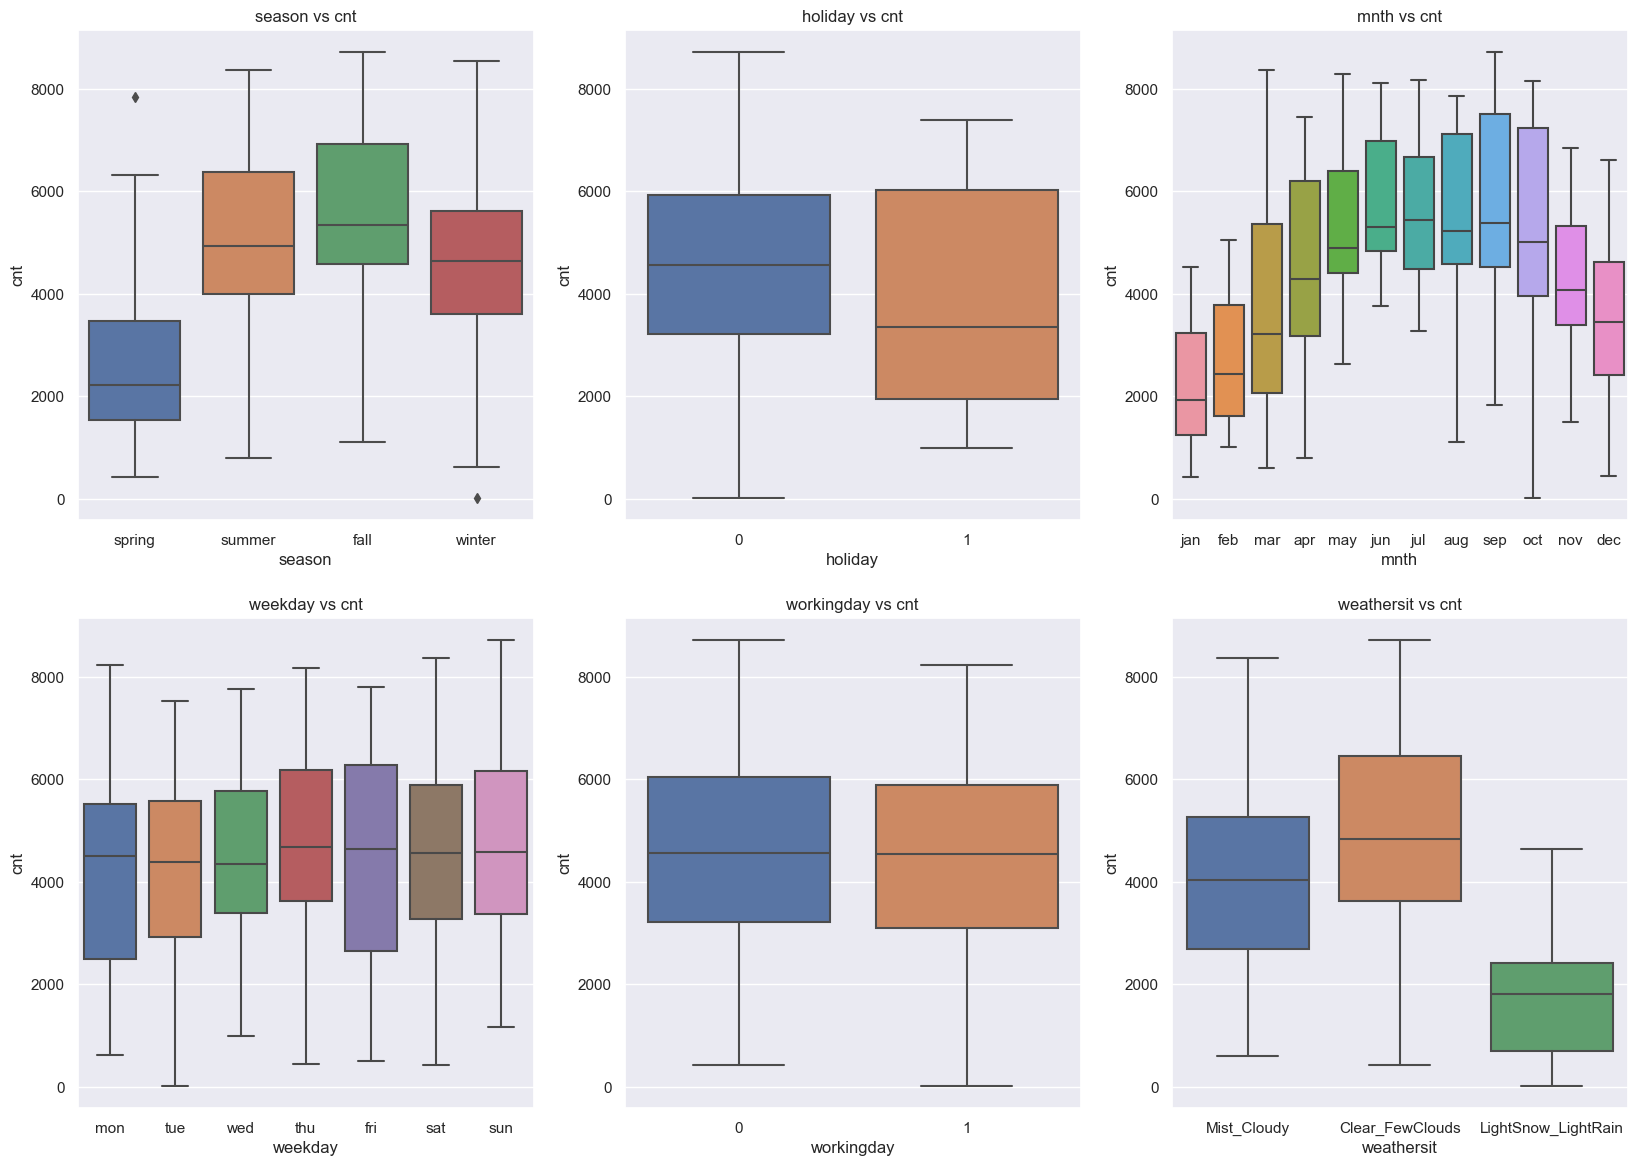

In [ ]:
#visualising the categorical columns

plt.figure(figsize=(20,14))
def plot_categorical_boxplots(df, columns):
    num = len(columns)
    rows = num//3
    for index, col in enumerate(columns):
        plt.subplot(rows, 3, index+1)
        sns.boxplot(data=df, x=col, y='cnt')
        plt.title(f'{col} vs cnt')
    plt.show()

columns = ['season', 'holiday', 'mnth', 'weekday', 'workingday', 'weathersit']
plot_categorical_boxplots(df, columns)

### Some Notable Observations:

- **season**: Almost 26% of the bike bookings were done in season 3 in 2018 and 2019. This was followed by Summer and Spring. This indicates season can be a good predictor for the dependent variable.

- **mnth**: Jan and Feb seem to be the least bike booking months whereas in sept when observed the most.

- **weathersit**: Almost 64% of the bike bookings were happening during good weather situations i.e. Clear, Few clouds, Partly cloudy, Partly cloudy weather for 2 years. This was followed by moderate and bad weather situations. This suggests that weathersit, which shows a tendency toward bike ride bookings, might be an effective predictor of the dependent variable.

- **holiday**: Almost 97% of the bike bookings were happening when it was not a holiday which means this data is biased. Therefore, holiday cannot be a good predictor for the dependent variable.

- **weekday**: The weekday variable shows a very close trend on all days of the week. This variable can have some or no influence on the predictor. We will check during model prediction.

- **workingday**: Almost 69% of the bike bookings were done on ‘workingday’. This also indicates that workingday can be a good predictor for the dependent variable.

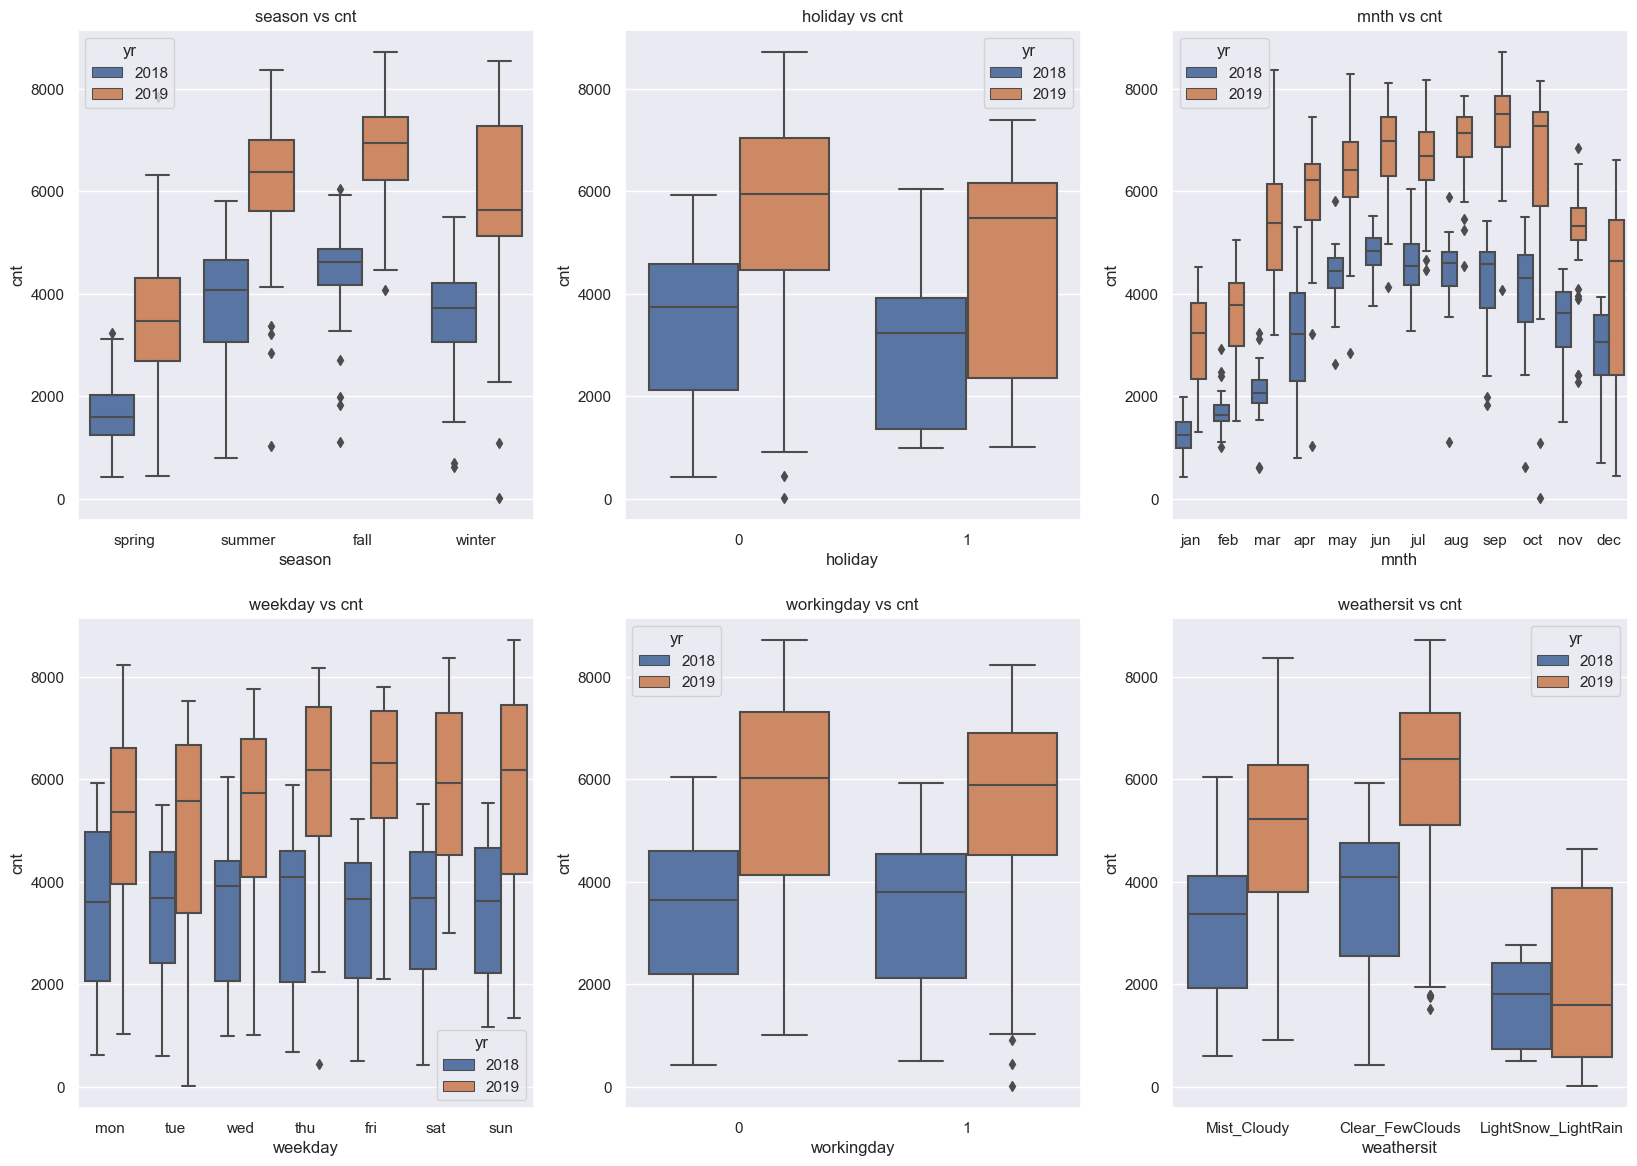

In [ ]:
#visualising the categorical variables with hue as year

plt.figure(figsize=(20,14))
def plot_categorical_boxplots(df, columns):
    num = len(columns)
    rows = num//3
    for index, col in enumerate(columns):
        plt.subplot(rows, 3, index+1)
        sns.boxplot(data=df, x=col, y='cnt', hue='yr')
        plt.title(f'{col} vs cnt')
    plt.show()

columns = ['season', 'holiday', 'mnth', 'weekday', 'workingday', 'weathersit']
plot_categorical_boxplots(df, columns)

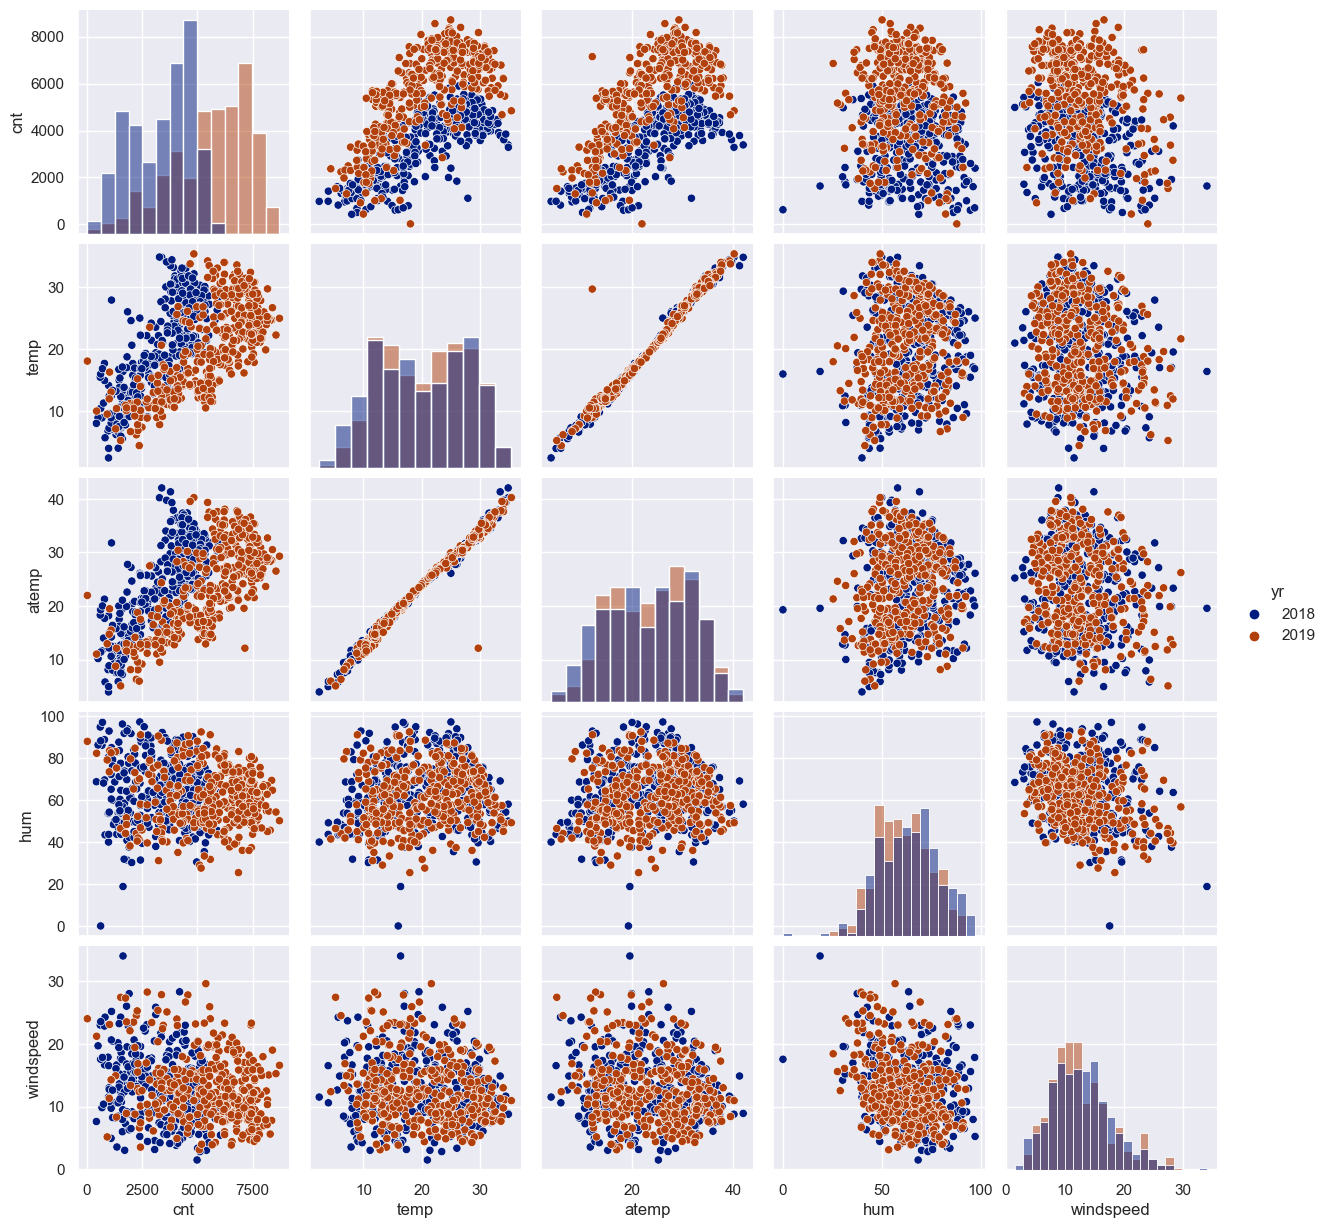

In [ ]:
# Pairplot for Numerical Variables

numerical_columns = ['cnt', 'temp', 'atemp', 'hum','windspeed']
sns.pairplot(df, vars=numerical_columns, hue='yr', diag_kind='hist', palette='dark')
plt.show()

### Some notable Insights:

- By visualizing the pairplot of numeric variables, “temp” and “atemp” are the two numerical variables which has the highest correlation with the target variable (cnt). We can determine that a linear model is appropriate in this scenario since there are at least some independent variables, such as atemp, temp, and so on, that have a positive correlation with the target variable cnt.

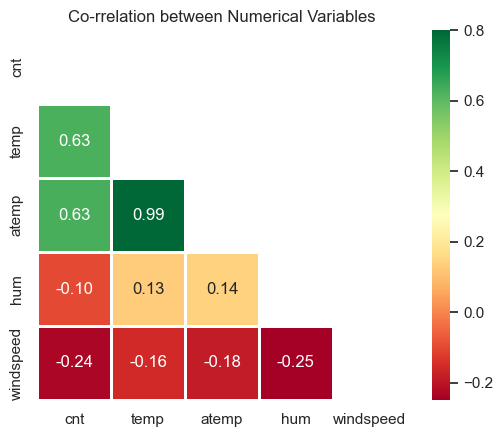

In [ ]:
# Checking the correlation between the continuous numerical variables
sns.set(style="white")
matrix = np.triu(df[numerical_columns].corr())
sns.heatmap(df[numerical_columns].corr(), annot = True, vmax=0.8, square=True, cmap="RdYlGn", fmt=".2f", mask=matrix, linewidths=2)
plt.title("Co-rrelation between Numerical Variables")
plt.show()

### Some Notable Observations:

- Here, we can observe that temp and atemp have a higher correlation of 0.99 (strongly correlated)
- Hence we will either use temp or atemp as there is high multicolinearity amongst the two.

In [ ]:
# temp and atemp are directly correlated among each other. Hence, we will use temp and drop atemp

df.drop(['atemp'], axis=1, inplace=True)

### Data prepration

In [ ]:
# Using get_dummies creating Dummy variable for mnth, weekday, weathersit and season

months_df = pd.get_dummies(df['mnth'], drop_first=True).astype(int)
weekdays_df = pd.get_dummies(df['weekday'], drop_first=True).astype(int)
weathersit_df = pd.get_dummies(df['weathersit'], drop_first=True).astype(int)
seasons_df = pd.get_dummies(df['season'], drop_first=True).astype(int)

In [ ]:
# Converting yr 2018 back to 0 and 2019 to 1

df.yr.replace({2018: 0, 2019: 1},inplace = True)

In [ ]:
# Merging the original dataframe with the dummy variable dataset

df = pd.concat([df, months_df, weekdays_df, weathersit_df, seasons_df], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,sat,sun,thu,tue,wed,LightSnow_LightRain,Mist_Cloudy,spring,summer,winter
0,spring,0,jan,0,mon,1,Mist_Cloudy,14.110847,80.5833,10.749882,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,tue,1,Mist_Cloudy,14.902598,69.6087,16.652113,...,0,0,0,1,0,0,1,1,0,0
2,spring,0,jan,0,wed,1,Clear_FewClouds,8.050924,43.7273,16.636703,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,jan,0,thu,1,Clear_FewClouds,8.200000,59.0435,10.739832,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,jan,0,fri,1,Clear_FewClouds,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# dropping those columns since we have already created dummy variable out of it

df.drop(['mnth', 'weekday', 'weathersit', 'season'], axis=1, inplace=True)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,LightSnow_LightRain,Mist_Cloudy,spring,summer,winter
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   hum                  730 non-null    float64
 5   windspeed            730 non-null    float64
 6   cnt                  730 non-null    int64  
 7   aug                  730 non-null    int64  
 8   dec                  730 non-null    int64  
 9   feb                  730 non-null    int64  
 10  jan                  730 non-null    int64  
 11  jul                  730 non-null    int64  
 12  jun                  730 non-null    int64  
 13  mar                  730 non-null    int64  
 14  may                  730 non-null    int64  
 15  nov                  730 non-null    int

In [ ]:
df.nunique()

yr                       2
holiday                  2
workingday               2
temp                   498
hum                    594
windspeed              649
cnt                    695
aug                      2
dec                      2
feb                      2
jan                      2
jul                      2
jun                      2
mar                      2
may                      2
nov                      2
oct                      2
sep                      2
mon                      2
sat                      2
sun                      2
thu                      2
tue                      2
wed                      2
LightSnow_LightRain      2
Mist_Cloudy              2
spring                   2
summer                   2
winter                   2
dtype: int64

### Splitting the Data into Training and Testing Sets

In [ ]:
# specifying 'random_state' so that the train and test dataset always have the same rows

df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 10)

In [ ]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 566 to 323
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   220 non-null    int64  
 1   holiday              220 non-null    int64  
 2   workingday           220 non-null    int64  
 3   temp                 220 non-null    float64
 4   hum                  220 non-null    float64
 5   windspeed            220 non-null    float64
 6   cnt                  220 non-null    int64  
 7   aug                  220 non-null    int64  
 8   dec                  220 non-null    int64  
 9   feb                  220 non-null    int64  
 10  jan                  220 non-null    int64  
 11  jul                  220 non-null    int64  
 12  jun                  220 non-null    int64  
 13  mar                  220 non-null    int64  
 14  may                  220 non-null    int64  
 15  nov                  220 non-null    int64 

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 72 to 265
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   510 non-null    int64  
 1   holiday              510 non-null    int64  
 2   workingday           510 non-null    int64  
 3   temp                 510 non-null    float64
 4   hum                  510 non-null    float64
 5   windspeed            510 non-null    float64
 6   cnt                  510 non-null    int64  
 7   aug                  510 non-null    int64  
 8   dec                  510 non-null    int64  
 9   feb                  510 non-null    int64  
 10  jan                  510 non-null    int64  
 11  jul                  510 non-null    int64  
 12  jun                  510 non-null    int64  
 13  mar                  510 non-null    int64  
 14  may                  510 non-null    int64  
 15  nov                  510 non-null    int64  

### Rescaling the features using MinMaxScaler from sklearn

In [ ]:
# Apply scaler() to all the columns except columns having '0, 1' values and dummy' variables

num_cols = ['cnt', 'temp', 'hum','windspeed']
scaler = MinMaxScaler()
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

In [ ]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,LightSnow_LightRain,Mist_Cloudy,spring,summer,winter
72,0,0,1,0.298094,0.393891,0.236118,0.194978,0,0,0,...,0,0,0,0,1,0,0,1,0,0
510,1,0,0,0.778657,0.694105,0.364071,0.737052,0,0,0,...,0,1,0,0,0,0,0,0,1,0
700,1,0,1,0.327249,0.809877,0.210252,0.509236,0,1,0,...,0,0,0,0,0,0,1,0,0,1
264,0,0,0,0.694699,0.910249,0.217975,0.526862,0,0,0,...,1,0,0,0,0,0,1,0,0,0
577,1,0,1,0.811368,0.624004,0.244886,0.863093,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,LightSnow_LightRain,Mist_Cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.033333,0.696078,0.513354,0.563841,0.342904,0.492000,0.076471,0.094118,0.076471,...,0.133333,0.143137,0.158824,0.127451,0.156863,0.033333,0.345098,0.247059,0.256863,0.260784
std,0.500429,0.179682,0.460401,0.233194,0.183851,0.162760,0.236196,0.266010,0.292279,0.266010,...,0.340268,0.350557,0.365870,0.333805,0.364028,0.179682,0.475867,0.431725,0.437332,0.439494
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.314983,0.426048,0.225964,0.325456,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.506613,0.562400,0.322431,0.490945,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.721686,0.697621,0.434281,0.675812,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


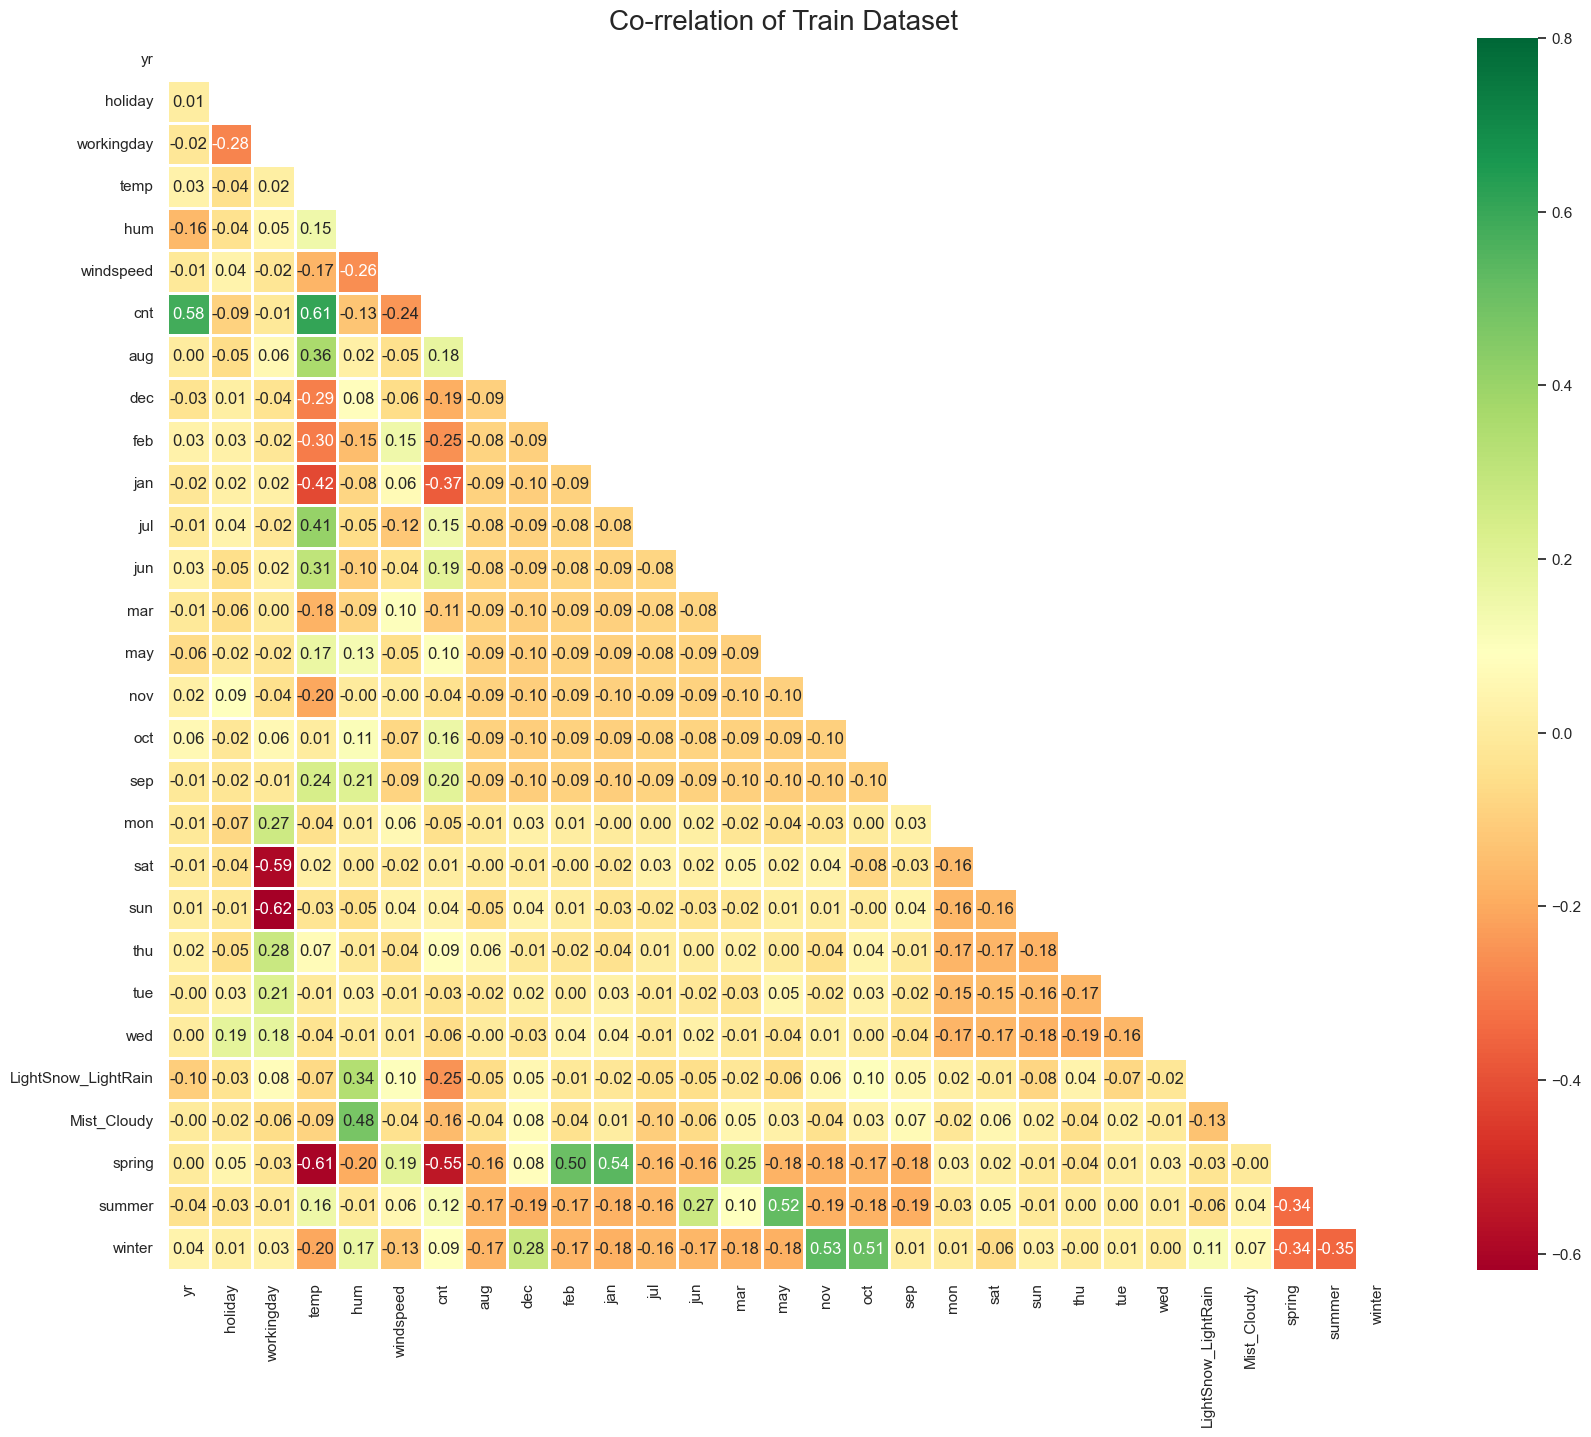

In [ ]:
# Checking correlation among variables after rescaling

sns.set(style="white")
plt.figure(figsize = (20,16))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, vmax=0.8, square=True, cmap="RdYlGn", fmt=".2f", mask=matrix, linewidths=2)
plt.title("Co-rrelation of Train Dataset", fontsize=20)
plt.show()

#### Some Notable Observations:

- ```cnt```, ```temp```, and ```cnt```, ```yr``` seems to have good correlation. Similarly, moderate weather situation (Mist_Cloudy) and humidity show positive correlation.

- The season of Spring shows good correlation with Jan and Feb month, similarly Summer season with may month show good positive correlation and Winter season with oct and nov month show good positive correlation which is obvious based on climatic seasons.

## Building the Linear Model

In [ ]:
# Separating cnt column since this is the value on which it has to be trained

y_train = df_train.pop('cnt')
X_train = df_train

In [ ]:
# Using RFE from sklearn

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
# List of variables selected afte using RFE

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 2),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 3),
 ('mar', False, 10),
 ('may', False, 6),
 ('nov', True, 1),
 ('oct', False, 14),
 ('sep', True, 1),
 ('mon', False, 13),
 ('sat', False, 8),
 ('sun', False, 7),
 ('thu', False, 5),
 ('tue', False, 9),
 ('wed', False, 11),
 ('LightSnow_LightRain', True, 1),
 ('Mist_Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', False, 12),
 ('winter', True, 1)]

In [ ]:
# columns that has been selected by RFE

cols = X_train.columns[rfe.support_]
print(cols)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'dec', 'feb', 'jan', 'jul',
       'nov', 'sep', 'LightSnow_LightRain', 'Mist_Cloudy', 'spring', 'winter'],
      dtype='object')


In [ ]:
# columns that has been rejected by RFE

X_train.columns[~rfe.support_]

Index(['workingday', 'aug', 'jun', 'mar', 'may', 'oct', 'mon', 'sat', 'sun',
       'thu', 'tue', 'wed', 'summer'],
      dtype='object')

In [ ]:
# Generic function to build model using statsmodel library

def build_model(X, y):
    X = sm.add_constant(X)  # Adding constant
    lm = sm.OLS(y, X).fit() # fitting model
    print(lm.summary())     # model summary
    return X


# Generic function to calculate VIF of variables using statsmodel library

def calculateVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending=False)
    return vif

In [ ]:
X_train_rfe = X_train[cols]
calculateVIF(X_train_rfe)

,Features,VIF
3,hum,17.26
2,temp,13.62
4,windspeed,4.79
13,spring,4.47
14,winter,2.82
12,Mist_Cloudy,2.50
7,jan,2.40
6,feb,2.16
0,yr,2.08
9,nov,1.88


In [ ]:
X_train_lm = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     181.5
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          7.66e-190
Time:                        00:08:34   Log-Likelihood:                 490.56
No. Observations:                 510   AIC:                            -949.1
Df Residuals:                     494   BIC:                            -881.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3671    

### Building 1st linear regression model

In [ ]:
# Humidity has the highest VIF, hence we can drop it for now

X_train_new = X_train_rfe.drop(['hum'], axis=1)

In [ ]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.97
3,windspeed,4.77
12,spring,4.20
13,winter,2.61
6,jan,2.29
5,feb,2.14
0,yr,2.05
8,nov,1.84
4,dec,1.64
11,Mist_Cloudy,1.55


In [ ]:
X_train_lm_1 = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     181.5
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          7.66e-190
Time:                        00:08:35   Log-Likelihood:                 490.56
No. Observations:                 510   AIC:                            -949.1
Df Residuals:                     494   BIC:                            -881.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3671    

### Building 2nd linear regression model

In [ ]:
# We can drop feb column since it has high p-value of 0.011

X_train_new = X_train_new.drop(['feb'], axis = 1)

In [ ]:
# calculating VIF for the new model after removing clear weathersit
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.91
3,windspeed,4.73
12,winter,2.55
11,spring,2.45
0,yr,2.05
7,nov,1.81
5,jan,1.61
10,Mist_Cloudy,1.55
4,dec,1.48
6,jul,1.37


### VIF doesnt seem to be affected much after dropping few variables. Lets try more to observe a better model.

In [ ]:
X_train_lm_2 = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.9
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          3.22e-186
Time:                        00:08:42   Log-Likelihood:                 476.42
No. Observations:                 510   AIC:                            -924.8
Df Residuals:                     496   BIC:                            -865.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2889    

### Building 3rd linear regression model

In [ ]:
# We can drop sep column since it has high p-value of 0.007

X_train_new = X_train_new.drop(['sep'], axis=1)

In [ ]:
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.70
2,temp,4.51
11,winter,2.53
10,spring,2.44
0,yr,2.05
7,nov,1.78
5,jan,1.61
9,Mist_Cloudy,1.54
4,dec,1.46
6,jul,1.32


In [ ]:
X_train_lm_3 = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     210.0
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          7.88e-186
Time:                        00:08:42   Log-Likelihood:                 472.71
No. Observations:                 510   AIC:                            -919.4
Df Residuals:                     497   BIC:                            -864.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2861    

### Building 4th linear regression model

In [ ]:
# We can drop jan column since it has high p-value of 0.003

X_train_new = X_train_new.drop(['jan'], axis=1)

In [ ]:
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.69
2,temp,4.48
10,winter,2.51
0,yr,2.05
9,spring,1.83
6,nov,1.77
8,Mist_Cloudy,1.54
4,dec,1.41
5,jul,1.32
7,LightSnow_LightRain,1.10


In [ ]:
X_train_lm_4 = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     224.9
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          3.66e-185
Time:                        00:08:43   Log-Likelihood:                 468.32
No. Observations:                 510   AIC:                            -912.6
Df Residuals:                     498   BIC:                            -861.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2689    

### Building 5th linear regression model

In [ ]:
# We can drop dec variable as it has high p-value of 0.001 and VIF

X_train_new = X_train_new.drop(['dec'], axis = 1)

In [ ]:
# calculating VIF for the new model after removing dec variable
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.68
2,temp,4.44
0,yr,2.05
9,winter,2.00
8,spring,1.78
5,nov,1.59
7,Mist_Cloudy,1.53
4,jul,1.31
6,LightSnow_LightRain,1.10
1,holiday,1.05


In [ ]:
X_train_lm_5 = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.2
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          6.35e-184
Time:                        00:08:44   Log-Likelihood:                 462.54
No. Observations:                 510   AIC:                            -903.1
Df Residuals:                     499   BIC:                            -856.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2503    

### Building 6th linear regression model

In [ ]:
# We can drop nov variable as it has high p-value of 0.003

X_train_new = X_train_new.drop(['nov'], axis = 1)

In [ ]:
# calculating VIF for the new model after removing nov
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.59
2,temp,4.36
0,yr,2.04
7,spring,1.77
6,Mist_Cloudy,1.52
8,winter,1.46
4,jul,1.31
5,LightSnow_LightRain,1.10
1,holiday,1.04


In [ ]:
X_train_lm_6 = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     262.8
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          3.29e-183
Time:                        00:08:45   Log-Likelihood:                 457.96
No. Observations:                 510   AIC:                            -895.9
Df Residuals:                     500   BIC:                            -853.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2402    

### We can consider to go with 6th model i.e X_train_lm_6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.


### F-Statistics value of 262.8  (which is greater than 1) and the p-value almost equals to zero, states that the overall model is significant

# Residual Analysis of the train data and validation

In [ ]:
# Checking the parameters and their coefficient values

lm_6 = sm.OLS(y_train, X_train_lm_6).fit()
lm_6.params

const                  0.240242
yr                     0.256247
holiday               -0.091278
temp                   0.456434
windspeed             -0.136822
jul                   -0.080959
LightSnow_LightRain   -0.265016
Mist_Cloudy           -0.081021
spring                -0.133627
winter                 0.048453
dtype: float64

In [ ]:
y_train_pred = lm_6.predict(X_train_lm_6)

### Normality of error terms

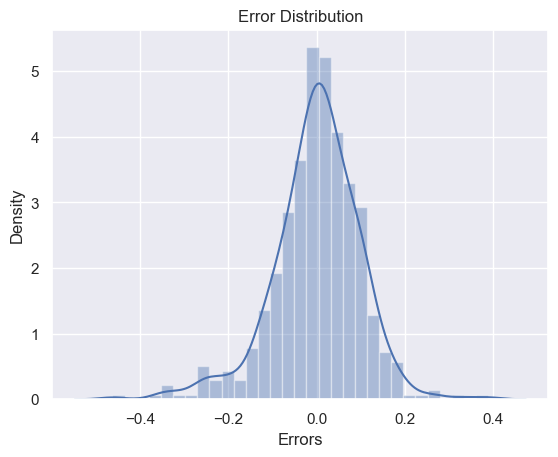

In [ ]:
sns.set(style="darkgrid")
sns.distplot((y_train - y_train_pred))
plt.title('Error Distribution')
plt.xlabel('Errors')
plt.show()

### Hence we can see that the Error terms are following normal distribution

### Cross-verifying the above conclusion using a qq-plot as well:

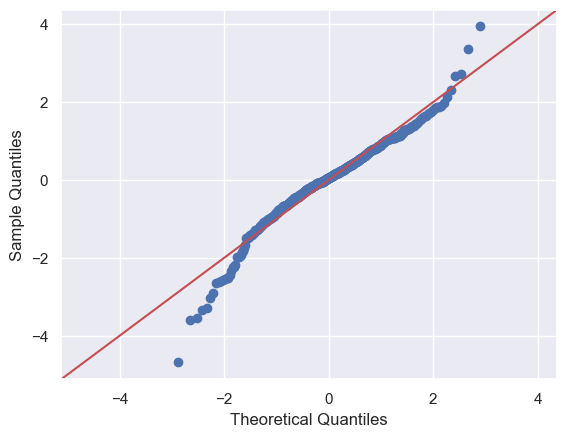

In [ ]:
# Plotting qq-plot of the error terms

sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

### We can see that most of the data points lie on a straight line, which indicates that error terms are normally distributed

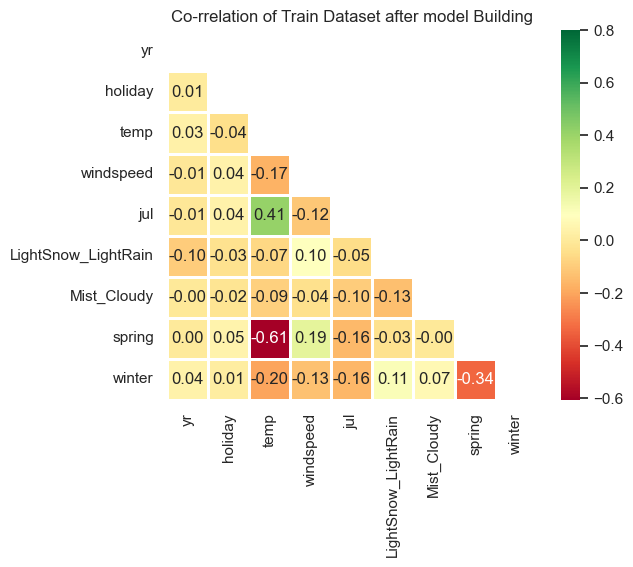

In [ ]:
# heatmap

sns.set(style='white')
matrix = np.triu(X_train_new.corr())
sns.heatmap(X_train_new.corr(), annot = True, vmax=0.8, square=True, cmap="RdYlGn", fmt=".2f", mask=matrix, linewidths=2)
plt.title("Co-rrelation of Train Dataset after model Building")
plt.show()

### There is no multicollinearity as seen from the heatmap.

### Checking Linearity

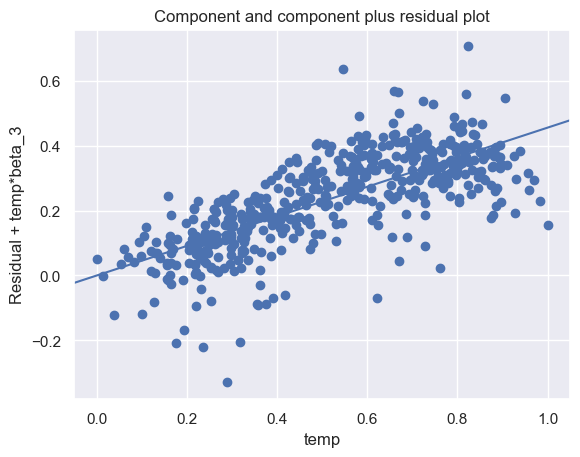

In [ ]:
# Linear relationship validation using CCPR plot

sns.set(style="darkgrid")
sm.graphics.plot_ccpr(lm_6, 'temp')
plt.show()

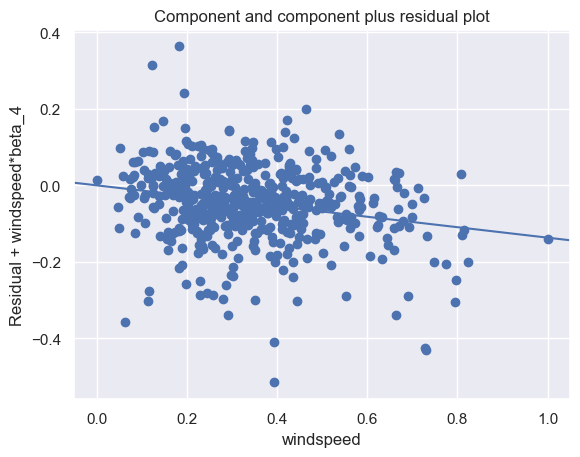

In [ ]:
sm.graphics.plot_ccpr(lm_6, 'windspeed')
plt.show()

### Homoscedasticity

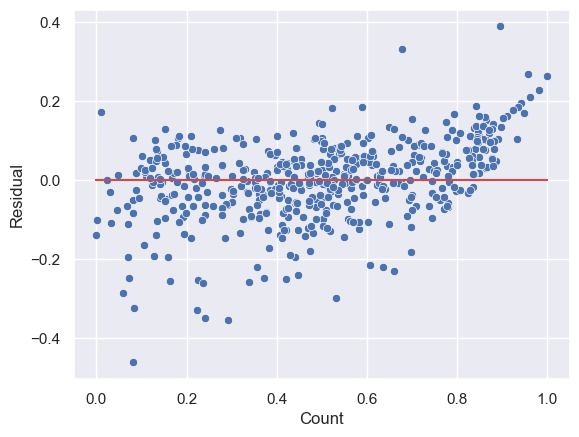

In [ ]:
residual = y_train - y_train_pred
sns.scatterplot(x=y_train, y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

### No visible pattern should be observed from above plot for residuals. Hence, we can conclude that it follows Homoscedasticity i.e. equal variances across different levels of an independent variable or across the values of a predicted variable in a linear regression model.

# Making Predictions Using the Final Model

#### Applying scaling on the test dataset

In [ ]:
num_cols = ['cnt', 'temp', 'hum','windspeed']
df_test[num_cols] = scaler.transform(df_test[num_cols])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,LightSnow_LightRain,Mist_Cloudy,spring,summer,winter
566,1,0,0,0.652175,0.863516,0.393568,0.486297,0,0,0,...,0,1,0,0,0,1,0,0,0,0
374,1,0,1,0.276477,0.584521,0.340487,0.382349,0,0,0,...,0,0,1,0,0,0,0,1,0,0
181,0,0,0,0.817910,0.265533,0.165370,0.595316,0,0,0,...,0,1,0,0,0,0,0,0,0,0
529,1,0,1,0.720868,0.486457,0.476922,0.836895,0,0,0,...,0,0,0,0,0,0,0,0,1,0
233,0,0,1,0.777567,0.359532,0.524373,0.522395,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,LightSnow_LightRain,Mist_Cloudy,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.018182,0.677273,0.538780,0.552654,0.355062,0.492709,0.104545,0.063636,0.077273,...,0.163636,0.140909,0.104545,0.181818,0.109091,0.018182,0.318182,0.245455,0.240909,0.204545
std,0.500809,0.133913,0.468586,0.253365,0.175978,0.152994,0.228453,0.306665,0.244661,0.267633,...,0.370789,0.348721,0.306665,0.386574,0.312464,0.133913,0.466833,0.431338,0.428610,0.404289
min,0.000000,0.000000,0.000000,-0.050062,-0.239512,0.041051,-0.049378,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.311711,0.420738,0.249687,0.338253,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.559495,0.556027,0.335269,0.509960,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.775931,0.679103,0.437533,0.653054,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.983645,0.969106,0.864144,0.933961,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y_test = df_test.pop('cnt')
X_test = df_test

In [ ]:
column_1 = X_train_new.columns
X_test = X_test[column_1]

In [ ]:
# Adding constant variable to test dataframe

X_test_lm_6 = sm.add_constant(X_test)
y_pred = lm_6.predict(X_test_lm_6)

### Metrics for Train Dataset

In [ ]:
mean_squared_error_train = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
r_squared = r2_score(y_train, y_train_pred)
adjusted_r_squared = (1- (1-r_squared) * (X_train.shape[0]-1) / (X_train.shape[0] - X_train.shape[1] - 1))

print('Mean_squared_error for train dataset : ', round(mean_squared_error_train , 5))
print('R-squared for train dataset : ', round(r_squared, 5))
print('Adjusted R Squared for train dataset : ',  round(adjusted_r_squared, 5))

Mean_squared_error for train dataset :  0.00972
R-squared for train dataset :  0.82547
Adjusted R Squared for train dataset :  0.81531


### Metrics for Test Dataset

In [ ]:
mean_squared_error_test = mean_squared_error(y_true=y_test, y_pred=y_pred)
r_squared = r2_score(y_test, y_pred)
adjusted_r_squared = (1- (1-r_squared) * (X_test.shape[0]-1) / (X_test.shape[0] - X_test.shape[1] - 1))

print('Mean_squared_error for test dataset : ', round(mean_squared_error_test , 5))
print('R-squared for test dataset : ', round(r_squared, 5))
print('Adjusted R Squared for test dataset : ',  round(adjusted_r_squared, 5))

Mean_squared_error for test dataset :  0.00968
R-squared for test dataset :  0.81372
Adjusted R Squared for test dataset :  0.80574


### Model Evaluation

In [ ]:
round(lm_6.params,4)

const                  0.2402
yr                     0.2562
holiday               -0.0913
temp                   0.4564
windspeed             -0.1368
jul                   -0.0810
LightSnow_LightRain   -0.2650
Mist_Cloudy           -0.0810
spring                -0.1336
winter                 0.0485
dtype: float64

### The equation for best fitted line is:
**cnt = 0.2402 + 0.2562 * yr - 0.0913 * holiday + 0.4564 * temp - 0.1368 * windspeed - 0.0810 * jul - 0.265 * LightSnow_LightRain -0.081 * Mist_Cloudy - 0.1336 * spring + 0.0485 * winter**       

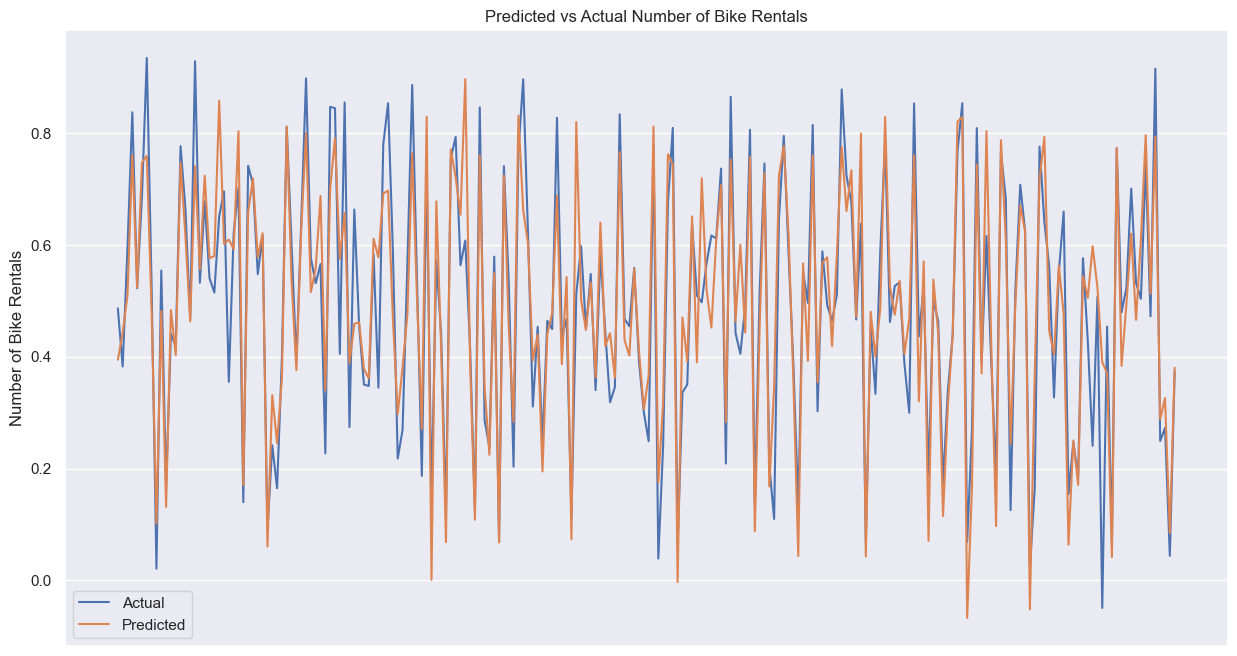

In [ ]:
# Plotting Actual vs Predicted No of bike rentals

fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_pred)),y_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual Number of Bike Rentals');
plt.ylabel('Number of Bike Rentals')
plt.xticks([])
plt.show()

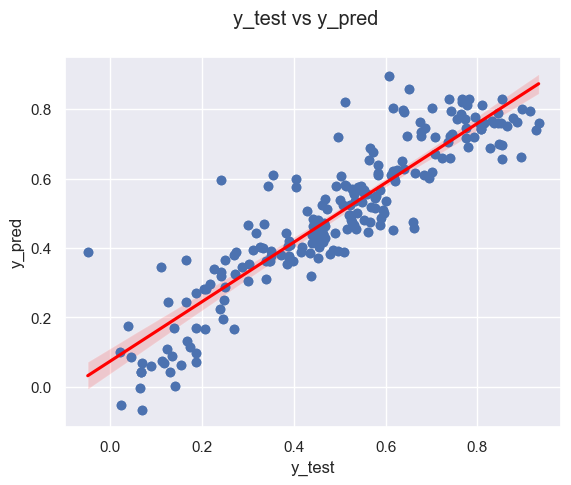

In [ ]:
# Plotting y_test and y_pred to understand the spread of data

fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

# Final Conclusion

### Training dataset:

- Mean_squared_error for train dataset :  0.00972
- R-squared for train dataset :  0.82547
- Adjusted R Squared for train dataset :  0.81531


### Testing dataset:

- Mean_squared_error for test dataset :  0.00968
- R-squared for test dataset :  0.81372
- Adjusted R Squared for test dataset :  0.80574


### The equation for best fitted line is:
**cnt = 0.2402 + 0.2562 * yr - 0.0913 * holiday + 0.4564 * temp - 0.1368 * windspeed - 0.0810 * jul - 0.265 * LightSnow_LightRain -0.081 * Mist_Cloudy - 0.1336 * spring + 0.0485 * winter**


### Demand of bikes depend on year, holiday, temp, windspeed,  july , LightSnow_LightRain,  Mist_Cloudy, spring and winter.

### Summary of the assignment

1. Performed EDA on the dataset to check for significant inferences and select variables for data preparation.
2. Analysed data using scatter plots for numerical data and boxplots for categorical variables.
3. Preparation of the data by transforming categorical categories to dummy variables using get_dummies
    - season
    - weathersit
    - month
    - weekday
    - registered
    
4. Dropped irrelevant (less useful attributes) and categorical variables from the data.
    - season
    - weathersit
    - month
    - weekday
    - instant
    - dteday
    - atemp
    - registered
    - casual
    
5. Splitting the dataset into test and train datasets with a 70:30 ratio.
6. Rescaled numerical variables using the MinMax approach.
7. Plotted a heatmap to test linearity among all variables and found temp to be the most significant attribute.
8. Used RFE for feature selection and created 5 more models to improve adjusted R-squared.
9. Manually identified other feature variables and created six more models to fine-tune the adjusted R-squared.
10. Analyzed residuals to ensure that the assumptions were correct.
11. Made predictions based on the train data.
12. The model was evaluated on test data and scored 81.37% accuracy.